In [1]:
import json
from os import listdir, makedirs
from os.path import basename, dirname, exists, isfile, join, realpath
import numpy as np
import matplotlib.pyplot as plt
import sys

{'std': 0.031853764697804106, '75th': 0.0, '25th': 0.0, '50th': 0.0, 'max': 7.48, '99th': 0.011, 'CoV': 48.51197409191375, 'min': 0.0, '1st': 0.0, 'npoints': 65903, 'avg': 0.000656616542494272}
{'std': 28.8340459629794, '75th': 138.59575, '25th': 101.58075, '50th': 118.676, 'max': 263.294, '99th': 213.28067000000001, 'CoV': 0.23742781809974187, 'min': 48.333, '1st': 67.50126, 'npoints': 22320, 'avg': 121.44341886200718}
{'std': 0.043680235105922983, '75th': 0.0, '25th': 0.0, '50th': 0.0, 'max': 3.629, '99th': 0.0, 'CoV': 72.05503091862717, 'min': 0.0, '1st': 0.0, 'npoints': 23040, 'avg': 0.0006062065972222222}


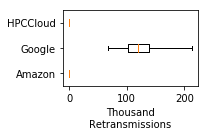

In [2]:


bw_values = dict()
retransmits = dict()

filedir = realpath("./")
inputdir = realpath(join(filedir, '../data/'))

def get_statistics(values, message):
	print("============================")
	result = dict()
	result["avg"] = np.mean(values)
	result["std"] = np.std(values)
	result["npoints"] = len(values)
	result["99th"] = np.percentile(values, 99)
	result["75th"] = np.percentile(values, 75)
	result["50th"] = np.percentile(values, 50)
	result["25th"] = np.percentile(values, 25)
	result["1st"] = np.percentile(values, 1)
	result["CoV"] = result["std"] / result["avg"]
	result["min"] = np.min(values)
	result["max"] = np.max(values)
	print(result)
	print("================================")
	return result

def get_bw_per_machine(machine_file, bw_values, retr):
	crnt_file = open(machine_file)
	data = json.load(crnt_file)

	no_intervals = len(data["intervals"])
	bandwidth = 0
	for i in range(0, no_intervals):
		no_bytes = data["intervals"][i]["sum"]["bits_per_second"]
		#bandwidth = (no_bytes * 8) / (10 * 1000 * 1000)
		bandwidth = no_bytes / (1000 * 1000)
		bw_values.append(bandwidth)
		retr.append(data["intervals"][i]["sum"]["retransmits"] / 1000.0)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3, 2))
hindex = 0

homedirs = [join(inputdir, 'fig6', "full-speed"), join(inputdir, 'fig5', 'full-speed'), join(inputdir, 'fig4', "full-speed")]
stats = dict()

for homedir in homedirs:
	bw_values[homedir] = []
	retransmits[homedir] = []
	machine_files = [join(homedir, f) for f in listdir(homedir) if isfile(join(homedir, f)) and f.endswith(".json")]

	for machine_file in machine_files:
		get_bw_per_machine(machine_file, bw_values[homedir], retransmits[homedir])

	stats[homedir] = get_statistics(retransmits[homedir], "bandwidth -> " + homedir)

	hindex += 1

ax.boxplot([retransmits[homedirs[0]], retransmits[homedirs[1]], retransmits[homedirs[2]]], positions=[1, 2, 3], whis=[1, 99], showfliers=False, vert=False)
ax.set_xlabel("Thousand\nRetransmissions")
ax.set_yticklabels(["Amazon", "Google", "HPCCloud"])
ax.set_xticks(np.arange(0, 210, 100))
plt.tight_layout()

plt.show()
